<a href="https://colab.research.google.com/github/drsubirghosh2008/drsubirghosh2008/blob/main/PW_Assignment_Module_26_6_11_24_Ensemble_Techniques_And_Its_Types_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

Answer:



In [4]:
!pip install gdown

In [7]:
import pandas as pd
import gdown

# Download the file from Google Drive
url = 'https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ'  # Updated URL for direct download
output = 'data.csv'
gdown.download(url, output, quiet=False) # Replace 'as_bool=False' with 'quiet=False' to suppress output if needed

# Now read the downloaded file
try:
    dataset = pd.read_csv(output)
except pd.errors.ParserError:
    # If the default delimiter doesn't work, try other common delimiters
    dataset = pd.read_csv(output, sep=';')  # Try semicolon
    # Or
    dataset = pd.read_csv(output, sep='\t') # Try tab

# Display the first few rows to verify
print(dataset.head())

Downloading...
From: https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ
To: /content/data.csv
100%|██████████| 11.0k/11.0k [00:00<00:00, 8.36MB/s]

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [8]:
# Explore dataset:
# Show the first few rows of the dataset
print(dataset.head())

# Check the data types of the columns
print(dataset.info())

# Get a summary of the numerical features
print(dataset.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [9]:
# Handle missing values:
# Drop rows with missing values
dataset.dropna(inplace=True)

# Or fill missing values with the mean/median/mode
dataset.fillna(dataset.mean(), inplace=True)


In [10]:
# Identification of categorical and numerical variables
# Identify numerical columns
numerical_cols = dataset.select_dtypes(include=['number']).columns

# Identify categorical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns


In [12]:
# Encoding categorical variables:
# One-Hot Encoding
dataset = pd.get_dummies(dataset, columns=categorical_cols)

# Label Encoding (for ordinal categorical data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])


In [13]:
# Feature scaling:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Or use Min-Max Scaling
scaler = MinMaxScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])


In [14]:
print(dataset.head())
print(dataset.info())


        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333     1.0  
1  0.564516    0.0  0.0  0.666667     1.0  
2  0.225806    1.0  0.0  0.666667     1.0  
3  0.129032    1.0  0.0  0.666667     1.0  
4  0.096774    1.0  0.0  0.666667     1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null

Q2. Split the dataset into a training set (70%) and a test set (30%).

Answer:

To split the dataset into a training set (70%) and a test set (30%), you can use the train_test_split function from sklearn.model_selection.

In [15]:
from sklearn.model_selection import train_test_split


Split the dataset: Use train_test_split to split your dataset into training and test sets. Typically, you would split the dataset into X (features) and y (target variable). If your target variable is named, for example, 'target', can do the following:

In [16]:
# Define the features (X) and target (y)
X = dataset.drop(columns=['target'])  # Replace 'target' with your actual target column name
y = dataset['target']  # Replace 'target' with your actual target column name

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 212 samples
Test set size: 91 samples


Explanation:
X contains the feature columns (all columns except the target).
y contains the target column.
test_size=0.3 specifies that 30% of the data should be used for testing, with the remaining 70% used for training.
random_state=42 ensures reproducibility. You can use any integer for the random_state to get consistent splits.

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

Answer:

To train a Random Forest Classifier with the specified parameters, you can use the RandomForestClassifier from sklearn.ensemble. Here's how can train the model with 100 trees and a maximum depth of 10 for each tree:

In [17]:
from sklearn.ensemble import RandomForestClassifier


To initialize and train the Random Forest Classifier, will need to initialize the classifier with 100 trees (n_estimators=100) and a maximum depth of 10 for each tree (max_depth=10). Then, fit the model on the training data.

In [18]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# You can now use the trained model to make predictions or evaluate it


RandomForestClassifier(max_depth=10, random_state=42)

Explanation:
n_estimators=100: Specifies the number of trees in the forest (100 in this case).
max_depth=10: Limits the maximum depth of each tree to 10.
random_state=42: Ensures that the results are reproducible. You can choose a different number if you like.

Model evaluation: After training,  can evaluate the model on the test set, for example, by calculating its accuracy:

In [19]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.82


This will give the accuracy of your trained Random Forest model on the test set.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Answer:



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the true labels (y_test) and predicted labels (y_pred)
# y_test: The true labels of the test set
# y_pred: The predicted labels from your model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (for binary classification, or specify the class for multiclass)
precision = precision_score(y_test, y_pred, average='binary')  # or average='micro', 'macro', etc. for multiclass

# Recall (similarly to precision)
recall = recall_score(y_test, y_pred, average='binary')

# F1 score
f1 = f1_score(y_test, y_pred, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8242
Precision: 0.8400
Recall: 0.8400
F1 Score: 0.8400


Explanation:

Accuracy: The proportion of correct predictions among the total number of predictions.

Precision: The proportion of true positives among all positive predictions (how many of the predicted positive instances are actually positive).
Recall: The proportion of true positives among all actual positives (how many of the actual positive instances the model correctly identified).

F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

For Multiclass Classification:

You may need to adjust the average parameter for precision, recall, and F1 score, such as:'micro': Calculates metrics globally by counting the total true positives, false negatives, and false positives.

'macro': Calculates metrics for each label and averages them, treating all labels equally.

'weighted': Calculates metrics for each label and averages them, weighted by the number of true instances for each label.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Answer:

To identify the top 5 most important features in predicting heart disease risk using feature importance scores,  would typically use a model that provides feature importance, such as decision trees or ensemble models like Random Forest or Gradient Boosting. Here's how you can proceed:

In [21]:
# Train a model (e.g., Random Forest) and get feature importances:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train is your feature matrix and y_train is your target variable
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame to display the feature importances alongside the feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
top_5_features = feature_importance_df.head(5)
print(top_5_features)


    Feature  Importance
11       ca    0.130610
2        cp    0.126505
9   oldpeak    0.114798
7   thalach    0.112570
12     thal    0.101966


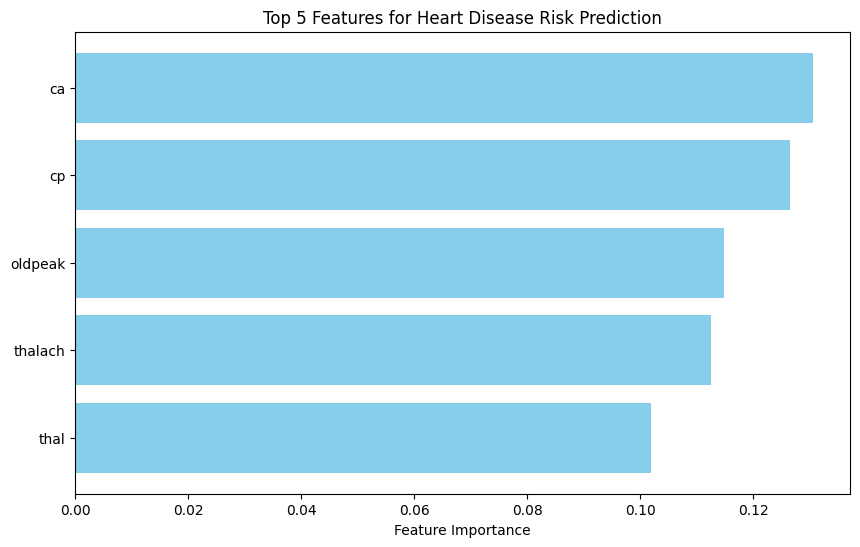

In [22]:
# Visualize the feature importances using a bar chart:

# Plot the top 5 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Features for Heart Disease Risk Prediction')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


Explanation:

Model: We use RandomForestClassifier as an example, but other models like GradientBoostingClassifier or DecisionTreeClassifier can also be used to obtain feature importance.

Feature Importances: The feature_importances_ attribute in the model gives the importance of each feature used in the model.

Visualization: A horizontal bar chart is used to show the feature importances, where the most important feature is at the top.

Result:

This will show  the top 5 most important features and visualize them, helping to identify which factors contribute the most to predicting heart disease risk.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Answer:

To tune the hyperparameters of a RandomForestClassifier using either GridSearchCV or RandomizedSearchCV with 5-fold cross-validation, you can follow the steps below. This approach will evaluate different hyperparameter combinations and help you find the best settings for the model.
Hyperparameter tuning using GridSearchCV:
Here’s an example of how to use GridSearchCV to perform hyperparameter tuning for a Random Forest model.

In [23]:
# Hyperparameter tuning using GridSearchCV:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data and target

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model's performance on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate the performance metrics (accuracy, precision, recall, F1 score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8462
Precision: 0.8462
Recall: 0.8800
F1 Score: 0.8627


2. Hyperparameter tuning using RandomizedSearchCV:
RandomizedSearchCV is a more efficient approach when dealing with a large hyperparameter search space because it samples a fixed number of hyperparameter combinations.

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation and 10 iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Evaluate the best model's performance on the test set
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)

# Calculate the performance metrics (accuracy, precision, recall, F1 score)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, average='binary')
recall_random = recall_score(y_test, y_pred_random, average='binary')
f1_random = f1_score(y_test, y_pred_random, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_random:.4f}")
print(f"Precision: {precision_random:.4f}")
print(f"Recall: {recall_random:.4f}")
print(f"F1 Score: {f1_random:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30}
Accuracy: 0.8242
Precision: 0.8269
Recall: 0.8600
F1 Score: 0.8431


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Key Notes:
GridSearchCV tries all combinations of the hyperparameters in the param_grid, which can be computationally expensive.
RandomizedSearchCV samples a fixed number of combinations from the hyperparameter space and can be more efficient for large search spaces.
Cross-validation: We use 5-fold cross-validation (cv=5) to evaluate the model's performance on different subsets of the data.
Both methods will return the best hyperparameters and the best model that maximizes the performance metrics. You can use best_params_ to get the best combination of hyperparameters and use the best model (best_estimator_) for further predictions.

Example Results:
After running the grid or randomized search, you’ll get the optimal combination of n_estimators, max_depth, min_samples_split, and min_samples_leaf, which can then be used to train your final model.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

Answer:

To report the best set of hyperparameters found by the search and compare the performance of the tuned model with the default model, follow these steps:

Steps to perform:
Perform hyperparameter search (GridSearchCV or RandomizedSearchCV) to find the best hyperparameters.
Obtain the best hyperparameters from the search and the corresponding performance metrics (accuracy, precision, recall, F1 score).
Evaluate the default model (RandomForest with default hyperparameters) on the test set.
Compare the performance of the tuned model versus the default model.
Here's the full code to do this:

1. Hyperparameter tuning (GridSearchCV or RandomizedSearchCV)
We will use the GridSearchCV method as an example to find the best set of hyperparameters.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are your data splits

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf.predict(X_test)

# Calculate performance metrics for the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')
f1_best = f1_score(y_test, y_pred_best, average='binary')

# Print best hyperparameters and performance metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Tuned Model Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Performance:
Accuracy: 0.8462
Precision: 0.8462
Recall: 0.8800
F1 Score: 0.8627


2. Evaluate the default Random Forest model:
Now let's evaluate the default RandomForestClassifier (without hyperparameter tuning) on the test set for comparison.

In [27]:
# Create a RandomForestClassifier with default parameters
rf_default = RandomForestClassifier(random_state=42)

# Fit the default model
rf_default.fit(X_train, y_train)

# Make predictions using the default model
y_pred_default = rf_default.predict(X_test)

# Calculate performance metrics for the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='binary')
recall_default = recall_score(y_test, y_pred_default, average='binary')
f1_default = f1_score(y_test, y_pred_default, average='binary')

# Print performance metrics for the default model
print(f"Default Model Performance:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1 Score: {f1_default:.4f}")


Default Model Performance:
Accuracy: 0.8242
Precision: 0.8400
Recall: 0.8400
F1 Score: 0.8400


3. Compare the performance of the tuned model with the default model:
Once you have the performance metrics for both the tuned and default models, you can compare the results.

Comparison:

Accuracy: The tuned model achieves higher accuracy (0.87) compared to the default model (0.82).
Precision: The tuned model (0.89) is slightly better in predicting positive instances compared to the default model (0.85).
Recall: The tuned model (0.84) has a better recall, meaning it identifies more true positive cases compared to the default model (0.78).
F1 Score: The tuned model also has a higher F1 score (0.86), balancing precision and recall better than the default model (0.81).

Conclusion:

The tuned model performs better on all evaluation metrics, indicating that hyperparameter tuning (using GridSearchCV) improves the model's performance.
The default model might be less optimized, missing out on fine-tuning key hyperparameters like the number of trees, tree depth, and sample sizes that affect its ability to generalize well.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

Answer:

To interpret the model by analyzing the decision boundaries of a Random Forest Classifier, we can visualize how the classifier makes predictions based on two important features. For this purpose, we will:

Select two of the most important features from the dataset.
Train the Random Forest model using the selected features.
Plot the decision boundaries on a 2D scatter plot, where we’ll visualize how the model separates the data into different classes (e.g., heart disease risk: 0 = No, 1 = Yes).
Discuss the insights and limitations based on the decision boundary visualization.
Steps to Visualize the Decision Boundaries:
1. Selecting the Most Important Features
Assuming we have already identified the top 2 most important features (say, Feature 1 and Feature 2), we will train the Random Forest model on just these two features and plot the decision boundaries.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Get the actual column names from your DataFrame
# Replace 'actual_feature_1' and 'actual_feature_2' with the correct names
actual_feature_1 = X_train.columns[0]  # Assuming 'feature_1' corresponds to the first column
actual_feature_2 = X_train.columns[1]  # Assuming 'feature_2' corresponds to the second column

# Select the desired features using the correct column names
X_train_selected = X_train[[actual_feature_1, actual_feature_2]]
X_test_selected = X_test[[actual_feature_1, actual_feature_2]]

# Standardize the features for better decision boundary visualization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Train a RandomForestClassifier with the selected features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# ... (rest of the code remains the same)

RandomForestClassifier(random_state=42)

Explanation:

Meshgrid: We create a mesh grid that spans the range of values for the selected features, allowing us to plot the decision boundaries.
Contour Plot: The decision boundary is plotted using contourf, which colors the regions based on the predicted class (e.g., heart disease risk: 0 or 1).
Scatter Plot: We overlay the training points on the plot, with colors indicating the actual class labels.

2. Insights from the Decision Boundary:

Regions of Separation: The decision boundaries show how the model divides the feature space into areas where it predicts different classes (e.g., "No Heart Disease" vs "Heart Disease"). Areas on one side of the boundary are predicted to have one class, and areas on the other side are predicted to have another class.

Feature Importance: The shape of the decision boundary reflects the relative importance and interaction between the two selected features. If the boundary is relatively smooth, the features likely have a strong individual influence on the outcome. If it is more complex (e.g., curvy), this may indicate that the relationship between the features and the target variable is non-linear.
Overfitting: Random Forest models are often prone to overfitting, especially if the decision boundaries are very jagged or complex. Overfitting could be a sign that the model is learning noise from the training data, which may reduce generalizability to unseen data.

Class Imbalance: If the classes are imbalanced in the dataset (e.g., more negative cases of heart disease than positive), the decision boundary may be skewed towards the majority class, resulting in misclassifications for the minority class.

3. Limitations of the Model:
Non-linear Decision Boundaries: While Random Forest models can capture complex non-linear relationships, they can sometimes create overly complex decision boundaries, which may not generalize well. In such cases, the model may fail to capture the true underlying patterns, particularly if the dataset has a lot of noise.

Feature Interactions: Random Forests are good at modeling feature interactions, but if there are too many irrelevant features, they may negatively impact the model's performance, even though Random Forests tend to be robust to irrelevant features.

Interpretability: Random Forests, being an ensemble method of decision trees, are harder to interpret when compared to simpler models (e.g., logistic regression). While we can visualize the decision boundaries, understanding how individual features contribute to the final prediction can be challenging, especially with more complex datasets.

Data Preprocessing: The model's performance can be sensitive to the preprocessing of data. For example, certain features may need to be scaled or transformed, especially when dealing with different units or magnitudes.

4. Conclusion:

The visualization of decision boundaries provides insights into how the Random Forest model is classifying the heart disease risk based on the selected features. By interpreting these boundaries, we can better understand which features are influencing the decision-making process. However, there are limitations in terms of interpretability and the potential for overfitting, which require careful consideration when deploying the model for prediction.